<img alt='UCL' src="images/ucl_logo.png" align='center'>


# Formative Assessment: `numpy`

*Although we provide access to answers for this exercise, we want you to submit the codes you generate via Moodle, so that we can provide feedback. You should avoid looking at the answers before you submit your work. This submitted work does not count towards your course assessment, it is purely to allow us to provide some rapid feedback to you on how you are doing. You will need to put together a few elements from the notes so far to do all parts of this practical, but you should all be capable of doing it well. Pay attention to writing tidy code, with useful, clear comments and document strings.*

#### Exercise 1

Recall from [previous sections](030_NASA_MODIS_Earthdata.ipynb#MOTA) how to retrieve a MODIS LAI dataset for a particular date. Recall also values of greater than 100 are invalid, and that a scaling of 0.1 should be applied to the LAI.

* Load a MODIS LAI dataset SDS `Lai_500m` for tile `h17v03` day of year 41, 2019. 
* Call the 2D array `data` and confirm that it has a shape (2400, 2400)
* build a mask called `mask` of invalid pixels 
* print the percentage of invalid pixels to 2 decimal places (hint: sum with `sum`)
* scale the data array as appropriate to obtain LAI
* set invalid data values to 'not a number' `np.nan`
* display the resulting image

In [1]:
# ANSWER
import numpy as np
import matplotlib.pyplot as plt
from geog0111.modisUtils import modisAnnual
from osgeo import gdal

kwargs = {
    'tile'      :    ['h17v03'],
    'product'   :    'MCD15A3H',
    'sds'       :    ['Lai_500m'],
    'doys'       : [41],
    'year'      : 2019,
}

filename,bandname = modisAnnual(verbose=False,**kwargs)
print(f'filename:\n{filename}')
print(f'bandname:\n{bandname}')

filename:
{'Lai_500m': 'work/output_filename_YEAR_2019_DOYS_41_41_SDS_Lai_500m.vrt'}
bandname:
['2019-041']


In [2]:
# read VRT file using gdal
data = {}
for sds, fn in filename.items():
    g = gdal.Open(fn)
    if g:
        data[sds] = g.ReadAsArray()
    print(f"sub-dataset {sds} has the shape of {data[sds].shape}")

sub-dataset Lai_500m has the shape of (2400, 2400)


In [3]:
# get Lai data from the data dict
lai_data = data['Lai_500m']

# build a mask called 'mask' of invalid pixels
mask = (lai_data > 100)

# count the percentage of invalid pixels
perc = mask.sum() / (mask.shape[0] * mask.shape[1]) * 100
print(f'invalid pixels take up {perc:.2f}%')

invalid pixels take up 77.22%


In [4]:
# scale the data array as appropriate to obtain LAI
lai_data = lai_data * 0.1

# set invalid data values to 'not a number' np.nan
lai_data[mask] = np.nan

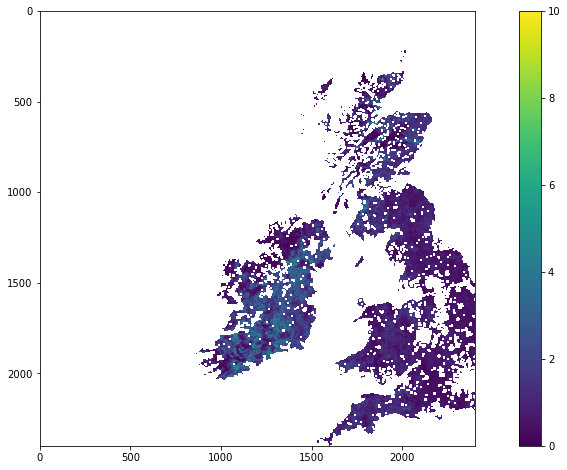

In [5]:
# plot image data: use vmin and vmax to set limits
fig, axs = plt.subplots(1,1,figsize=(16,8))
im = axs.imshow(lai_data,vmax=10,interpolation=None)
fig.colorbar(im, ax=axs)